## Setups

Importing libraries and stating data locations 

In [1]:
# importing the libraries tsert
import pandas as pd
import numpy as np
from sklearn import preprocessing
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

from collections import Counter

In [2]:
training_data = r"data/train_potus_by_county.csv"
testing_data = r"data/test_potus_by_county.csv"

## Reading in the data

In [3]:
df = pd.read_csv(training_data)

In [4]:
# Checking how the data looks
df.head(5)

,Total population,Median age,% BachelorsDeg or higher,Unemployment rate,Per capita income,Total households,Average household size,% Owner occupied housing,% Renter occupied housing,% Vacant housing,Median home value,Population growth,House hold growth,Per capita income growth,Winner
0,9278,37.9,12.6,21.3,13992.0,3802,2.42,51.9,16.6,31.6,63959.0,-0.69,-0.49,0.71,Barack Obama
1,18594,36.3,9.7,14.3,14622.0,6764,2.55,63.7,16.2,20.1,74330.0,-0.13,0.03,0.85,Barack Obama
2,662628,37.9,27.9,12.1,23909.0,267862,2.41,57.0,28.8,14.2,112687.0,-0.09,0.00,0.55,Barack Obama
3,21292,38.9,14.1,15.7,16829.0,8547,2.47,63.5,17.1,19.4,73643.0,-0.59,-0.43,0.57,Barack Obama
4,13252,34.5,15.0,15.8,13012.0,5222,2.47,53.7,20.7,25.6,56642.0,-1.16,-1.03,0.69,Barack Obama


In [5]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total population           1213 non-null   int64  
 1   Median age                 1213 non-null   float64
 2   % BachelorsDeg or higher   1213 non-null   float64
 3   Unemployment rate          1213 non-null   float64
 4   Per capita income          1213 non-null   float64
 5   Total households           1213 non-null   int64  
 6   Average household size     1213 non-null   float64
 7   % Owner occupied housing   1213 non-null   float64
 8   % Renter occupied housing  1213 non-null   float64
 9   % Vacant housing           1213 non-null   float64
 10  Median home value          1213 non-null   float64
 11  Population growth          1213 non-null   float64
 12  House hold growth          1213 non-null   float64
 13  Per capita income growth   1213 non-null   float

In [6]:
# Briefly checking the value distribution
df.describe()

,Total population,Median age,% BachelorsDeg or higher,Unemployment rate,Per capita income,Total households,Average household size,% Owner occupied housing,% Renter occupied housing,% Vacant housing,Median home value,Population growth,House hold growth,Per capita income growth
count,1.213000e+03,1213.000000,1213.000000,1213.000000,1213.000000,1.213000e+03,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,1.019248e+05,39.954493,19.186480,9.837593,21118.305853,3.805129e+04,2.493817,60.339324,21.881946,17.779225,118892.893652,0.255754,0.340956,2.030660
std,3.659055e+05,4.652347,8.405849,3.865796,5046.038916,1.246130e+05,0.203625,8.929037,7.398402,10.125619,71060.359705,0.933166,0.939244,0.742566
min,3.240000e+02,24.500000,6.400000,1.000000,7908.000000,9.800000e+01,1.840000,15.000000,4.600000,2.600000,29622.000000,-2.090000,-2.120000,0.050000
25%,1.162900e+04,37.300000,13.400000,7.400000,17989.000000,4.555000e+03,2.360000,55.800000,17.300000,10.800000,78313.000000,-0.360000,-0.250000,1.680000
50%,2.591600e+04,40.000000,17.100000,9.600000,20265.000000,1.000800e+04,2.460000,61.800000,20.600000,15.000000,100381.000000,0.070000,0.160000,2.130000
75%,6.743000e+04,42.800000,22.200000,12.100000,23217.000000,2.583000e+04,2.580000,66.200000,25.000000,21.900000,135466.000000,0.720000,0.780000,2.570000
max,1.024050e+07,56.600000,61.600000,26.500000,51818.000000,3.292577e+06,3.710000,81.900000,74.200000,65.900000,815417.000000,6.070000,6.420000,4.180000


In [7]:
# checking if the data is balanced
df.groupby("Winner").size()

Winner
Barack Obama    264
Mitt Romney     949
dtype: int64

## Binary Encode the Winner column

In [8]:
# Binary encode the the winner column
le = preprocessing.LabelEncoder()
le.fit(df['Winner'])

LabelEncoder()

In [9]:
df['Winner'] = le.transform(df['Winner'].copy())
le.classes_

array(['Barack Obama', 'Mitt Romney'], dtype=object)

In [10]:
# Checking for the encoded version of the tag column
df['Winner'].unique()

array([0, 1])

## Performing a train test split

In [11]:
# Importing the preparation libraries
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [12]:
# Splitting up the feature vs label columns
features_col = [i for i in df.columns if i != "Winner"]

# Changing the data set into numpy array for preparation
X = np.array(df[features_col])
y = np.array(df['Winner'])

In [13]:
# Perform a simple train test split
X_train, X_test, y_train, y_test = train_test_split(
                                                X, 
                                                y, 
                                                random_state=1,
                                                train_size=0.75,
#                                                 shuffle=True,
                                                stratify=y
                                            )

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# # Setting up the Stratified Shuffle Split
# sss = StratifiedShuffleSplit(n_splits=7, test_size=0.5, random_state=0)
# scaler = StandardScaler()

In [16]:
# # Use the shuffle
# for train_index, test_index in sss.split(X, y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     print(len(y_train))
#     print(y_train.sum())
#     print(train_index[:5])
#     print('-'*20)

## Oversample - SMOTE

In [17]:
# from imblearn.over_sampling import SMOTE

# X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(
#                                                         X_train_scaled, y_train
#                                                     )
# Counter(y_resampled)

## Undersample - ClusterCentroids

In [18]:
# from imblearn.under_sampling import ClusterCentroids

# cc = ClusterCentroids(random_state=1)
# X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
# Counter(y_resampled)

## Combination Sampling

In [19]:
# from imblearn.combine import SMOTEENN

# smote_enn = SMOTEENN(random_state=0)
# x_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
# Counter(y_resampled)

In [20]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

In [21]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [22]:
# from sklearn.svm import SVC

# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
# grid.fit(X_resampled,y_resampled)

In [23]:
# print(grid.best_params_)

In [24]:
from sklearn.svm import SVC


model = SVC(kernel='rbf')
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test_scaled)

print(classification_report_imbalanced(y_test, y_pred))

print('-'*20)
print(accuracy_score(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.62      0.62      0.89      0.62      0.75      0.54        66
          1       0.89      0.89      0.62      0.89      0.75      0.57       238

avg / total       0.84      0.84      0.68      0.84      0.75      0.56       304

--------------------
0.8355263157894737


In [25]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=4, )
neigh.fit(X_train_scaled, y_train)

y_pred = neigh.predict(X_test_scaled)

print(classification_report_imbalanced(y_test, y_pred))
print('-' * 20)
print(accuracy_score(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.61      0.45      0.92      0.52      0.65      0.40        66
          1       0.86      0.92      0.45      0.89      0.65      0.44       238

avg / total       0.81      0.82      0.56      0.81      0.65      0.43       304

--------------------
0.819078947368421


In [ ]:
from sklearn.svm import OneClassSVM


## Todo

- OneClassSVM
- XGBoost
- SVG Ensemble

In [26]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [27]:
y_pred = knn_gs.predict(X_test_scaled)
print(classification_report_imbalanced(y_test, y_pred))
print('-' * 20)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.44      0.88      0.47      0.62      0.37        66
          1       0.85      0.88      0.44      0.86      0.62      0.40       238

avg / total       0.77      0.78      0.53      0.78      0.62      0.40       304

--------------------


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lmodel = LogisticRegression(solver='saga', random_state=1, max_iter=2000)
lmodel.fit(X_resampled, y_resampled)
y_pred = lmodel.predict(X_test_scaled)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.55      0.67      0.85      0.60      0.75      0.56        66
          1       0.90      0.85      0.67      0.87      0.75      0.58       238

avg / total       0.83      0.81      0.71      0.82      0.75      0.57       304



In [30]:
from imblearn import FunctionSampler
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)

pipeline = [
    make_pipeline(FunctionSampler(), classifier),
    make_pipeline(RandomOverSampler(random_state=42), classifier),
    make_pipeline(ADASYN(random_state=42), classifier),
    make_pipeline(SMOTE(random_state=42), classifier),
]

In [31]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3)

In [32]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

pos_label = 0
disp = []
for model in pipeline:
    # compute the mean fpr/tpr to get the mean ROC curve
    mean_tpr, mean_fpr = 0.0, np.linspace(0, 1, 100)
    for train, test in cv.split(X, y):
        model.fit(X[train], y[train])
        y_proba = model.predict_proba(X[test])

        pos_label_idx = np.flatnonzero(model.classes_ == pos_label)[0]
        fpr, tpr, thresholds = roc_curve(
            y[test], y_proba[:, pos_label_idx], pos_label=pos_label
        )
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0

    mean_tpr /= cv.get_n_splits(X, y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    # Create a display that we will reuse to make the aggregated plots for
    # all methods
    disp.append(
        RocCurveDisplay(
            fpr=mean_fpr,
            tpr=mean_tpr,
            roc_auc=mean_auc,
            estimator_name=f"{model[0].__class__.__name__}",
        )
    )

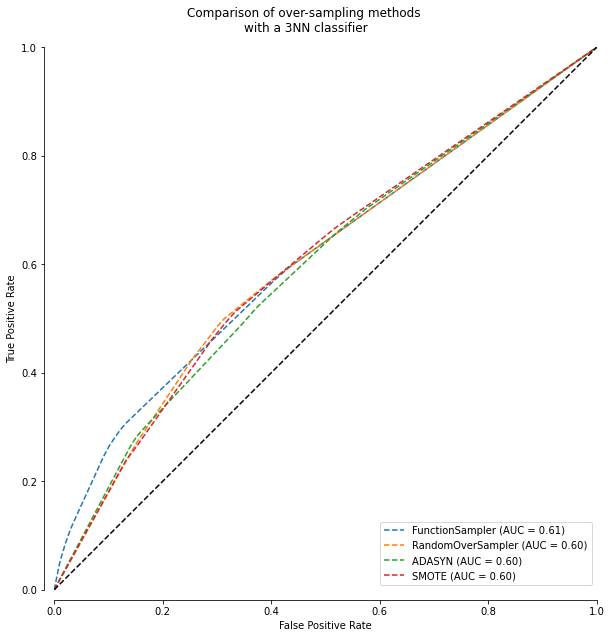

In [33]:


fig, ax = plt.subplots(figsize=(9, 9))
for d in disp:
    d.plot(ax=ax, linestyle="--")
ax.plot([0, 1], [0, 1], linestyle="--", color="k")
ax.axis("square")
fig.suptitle("Comparison of over-sampling methods \nwith a 3NN classifier")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
sns.despine(offset=10, ax=ax)
plt.tight_layout()
plt.show()